In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
X = pd.read_parquet('X.parquet')
Y = pd.read_parquet('Y.parquet')

In [6]:
# # Gerador de dados de entrada (5 variáveis)
# num_samples = 100
# X = np.random.rand(num_samples, 5)  # Dados de entrada aleatórios no intervalo [0, 1]

# # Gerar dados de saída (2 variáveis)
# Y = np.column_stack((np.sum(X[:, :3], axis=1), np.mean(X[:, 3:], axis=1)))

In [7]:
# descarregando valor do dataframe
X = X.values
Y = Y.values


# Dividir dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2
                                                    # , random_state=42
                                                    )

In [8]:
X.shape[1]

166

Epoch 1/500
1/1 - 1s - 1s/step - loss: 206.9151 - val_loss: 102.9153
Epoch 2/500
1/1 - 0s - 85ms/step - loss: 200.2620 - val_loss: 99.3128
Epoch 3/500
1/1 - 0s - 79ms/step - loss: 195.0216 - val_loss: 95.9261
Epoch 4/500
1/1 - 0s - 86ms/step - loss: 190.1418 - val_loss: 92.1990
Epoch 5/500
1/1 - 0s - 82ms/step - loss: 184.4139 - val_loss: 87.9960
Epoch 6/500
1/1 - 0s - 77ms/step - loss: 177.9801 - val_loss: 83.9409
Epoch 7/500
1/1 - 0s - 75ms/step - loss: 171.5811 - val_loss: 79.8218
Epoch 8/500
1/1 - 0s - 73ms/step - loss: 165.1029 - val_loss: 75.3733
Epoch 9/500
1/1 - 0s - 64ms/step - loss: 158.2397 - val_loss: 70.8367
Epoch 10/500
1/1 - 0s - 68ms/step - loss: 151.0968 - val_loss: 66.3726
Epoch 11/500
1/1 - 0s - 103ms/step - loss: 143.8968 - val_loss: 61.8326
Epoch 12/500
1/1 - 0s - 59ms/step - loss: 136.5754 - val_loss: 57.2820
Epoch 13/500
1/1 - 0s - 66ms/step - loss: 129.1385 - val_loss: 52.8491
Epoch 14/500
1/1 - 0s - 66ms/step - loss: 121.6655 - val_loss: 48.5145
Epoch 15/500
1/

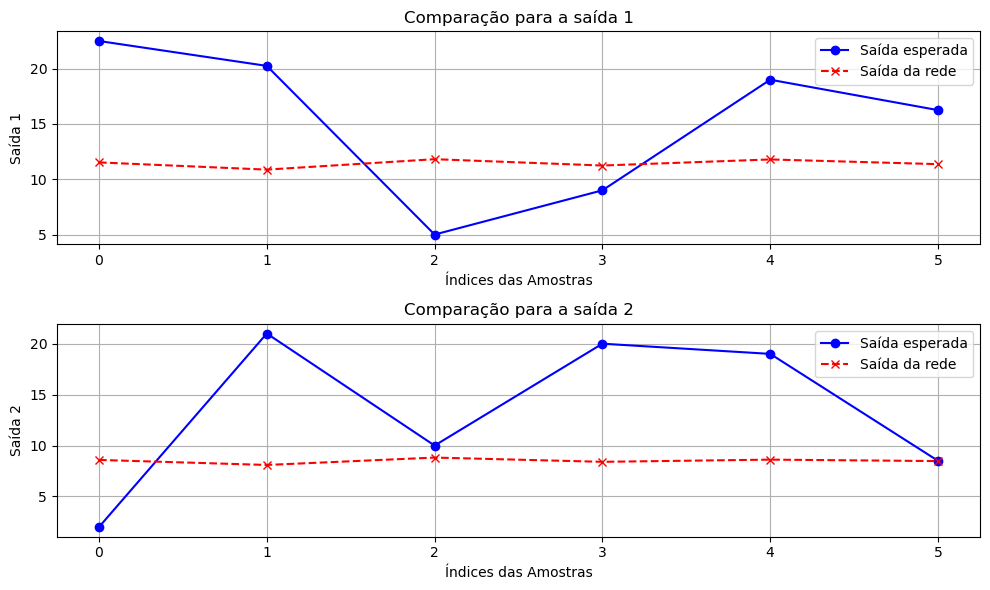

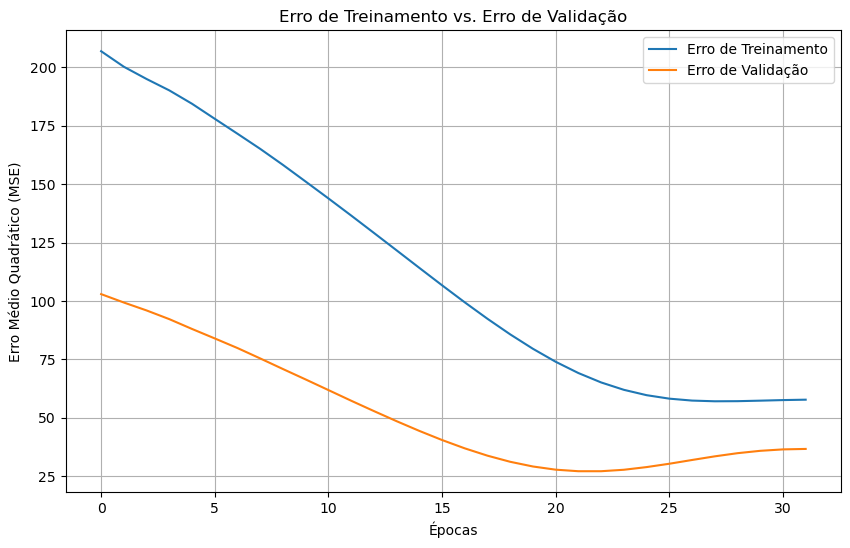

In [9]:
# Criar e configurar o modelo
model = Sequential()
model.add(Input(shape=(X.shape[1],)))# Hidden 1
# model.add(Dense(20, input_dim=X.shape[1], activation='relu'))# Camada oculta com n neurônios
model.add(Dense(200, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(Y.shape[1], activation='linear'))  # Camada de saída com 2 neurônios

# Compilar o modelo
model.compile(optimizer='nadam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a perda no conjunto de validação
    patience=10,         # Número de épocas sem melhora antes de parar
    restore_best_weights=True  # Restaura os pesos da melhor época
)

# Treinar o modelo com Early Stopping
history = model.fit(
    X_train, Y_train,
    epochs=500, 
    verbose=2, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Testar o modelo
Y_pred = model.predict(X_test)

# Avaliar desempenho
mse_error = mean_squared_error(Y_test, Y_pred)
print(f"Erro médio quadrático (MSE) no conjunto de teste: {mse_error:.4f}")

# Plotar resultados
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(Y_test[:, i], 'b-o', label='Saída esperada')
    plt.plot(Y_pred[:, i], 'r--x', label='Saída da rede')
    plt.xlabel('Índices das Amostras')
    plt.ylabel(f'Saída {i+1}')
    plt.legend()
    plt.grid(True)
    plt.title(f'Comparação para a saída {i+1}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento') 
plt.plot(history.history['val_loss'], label='Erro de Validação') 
plt.xlabel('Épocas') 
plt.ylabel('Erro Médio Quadrático (MSE)') 
plt.legend() 
plt.grid(True) 
plt.title('Erro de Treinamento vs. Erro de Validação') 
plt.show()


In [15]:
import os
save_path = "."

# Salvar o modelo completo em um arquivo HDF5
model.save(os.path.join(save_path, "network.h5"))
print("Modelo completo salvo em 'network.h5'")

Modelo completo salvo em 'network.h5'
